In [1]:
import importlib
import solver as sol 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
import odl

# CT Reconstruction for 2D Phantom Data

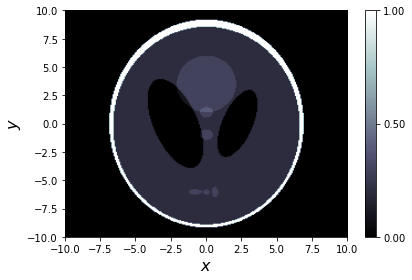

<Figure size 432x288 with 0 Axes>

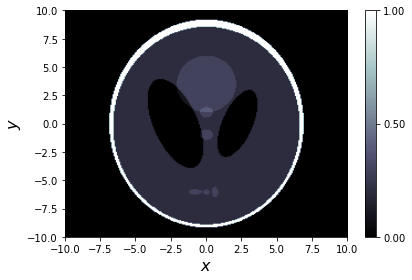

In [3]:
importlib.reload(sol)
sol_phantom = sol.CtSolver(n=256, type=sol.DataType.PHANTOM)
#plotting the phantom
sol_phantom.f_true.show()

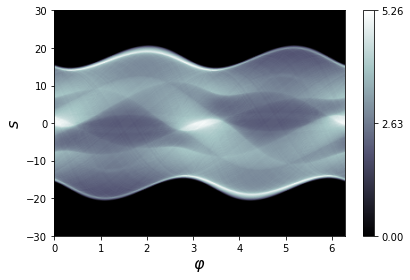

<Figure size 432x288 with 0 Axes>

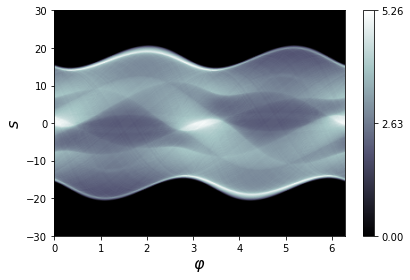

In [4]:
#Display the sinogram of the data
sol_phantom.g.show()

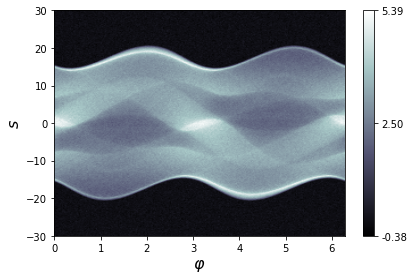

<Figure size 432x288 with 0 Axes>

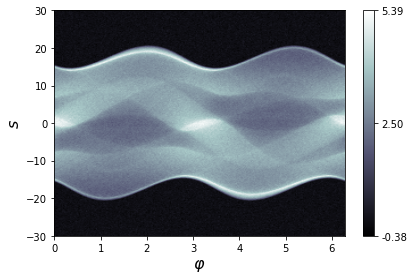

In [5]:
#Here we are adding noise to the sinogram data. We are adding a constant noise level
sol_phantom.add_noise(noise=0.1)
sol_phantom.g_noisy.show()

## Douglas Rachford primer dual solver

iter = 0


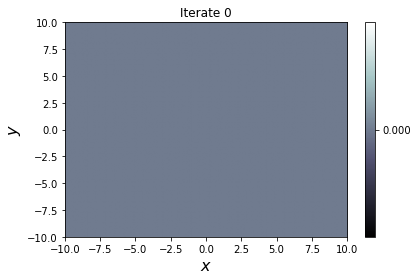

<Figure size 432x288 with 0 Axes>

iter = 10


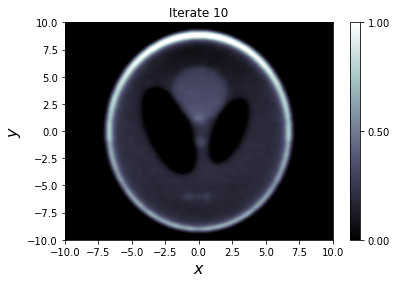

<Figure size 432x288 with 0 Axes>

iter = 20


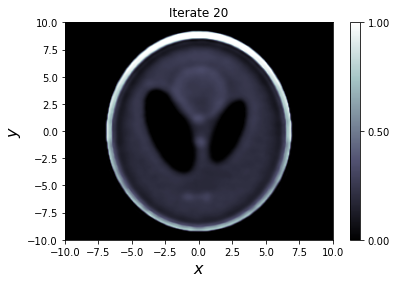

<Figure size 432x288 with 0 Axes>

iter = 30


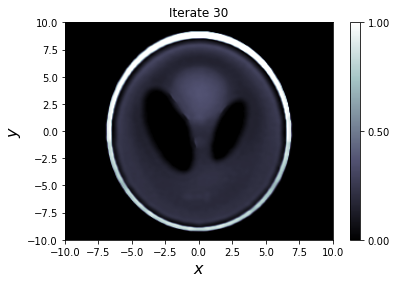

<Figure size 432x288 with 0 Axes>

iter = 40


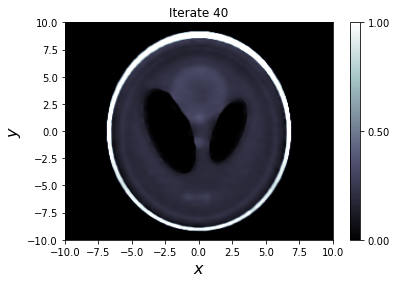

<Figure size 432x288 with 0 Axes>

iter = 50


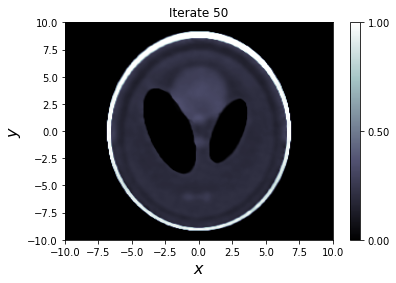

<Figure size 432x288 with 0 Axes>

iter = 60


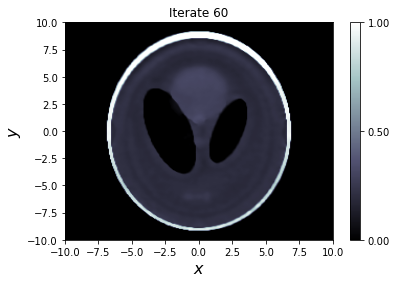

<Figure size 432x288 with 0 Axes>

iter = 70


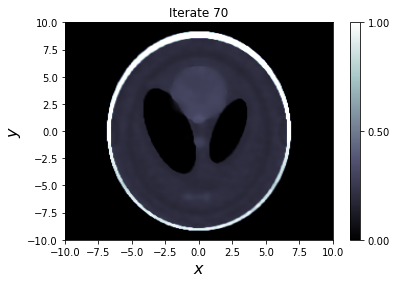

<Figure size 432x288 with 0 Axes>

iter = 80


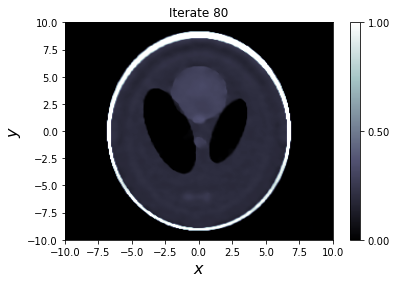

<Figure size 432x288 with 0 Axes>

iter = 90


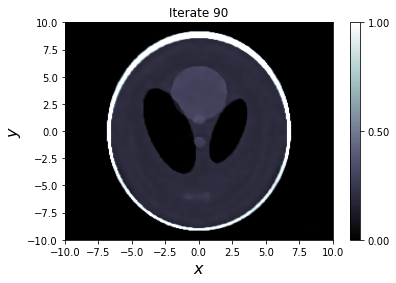

<Figure size 432x288 with 0 Axes>

In [2]:
importlib.reload(sol)
sol_phantom = sol.CtSolver(n=256, type=sol.DataType.PHANTOM)
sol_phantom.add_noise(noise=0.1)
recon_drpd, error_drpd = sol_phantom.solve_douglas_rachford_pd(gamma=0.01)

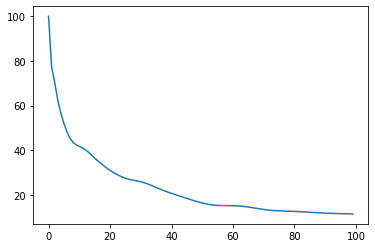

In [3]:
rel_error_drpd = np.array(error_drpd)/sol_phantom.f_true.norm() * 100
plt.plot(rel_error_drpd)

In [4]:
residual_error = (sol_phantom.f_true - recon_drpd).norm()
print('Residual Error', residual_error)

Residual Error 0.5664818181156062


## Steepest Decent Solver

learning_rate:0.0015134581883727712
iter = 0


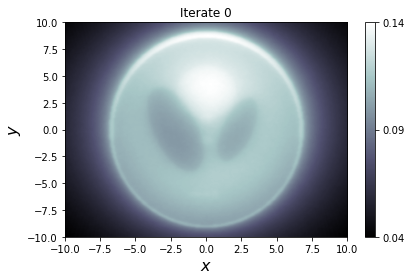

<Figure size 432x288 with 0 Axes>

iter = 10


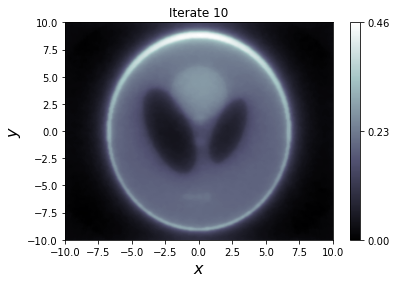

<Figure size 432x288 with 0 Axes>

iter = 20


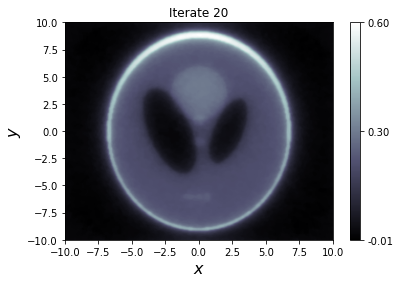

<Figure size 432x288 with 0 Axes>

iter = 30


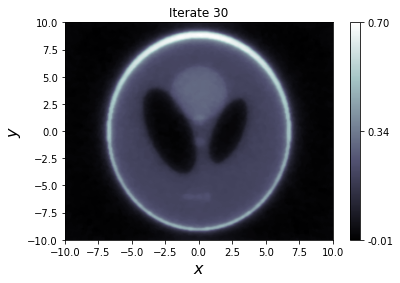

<Figure size 432x288 with 0 Axes>

iter = 40


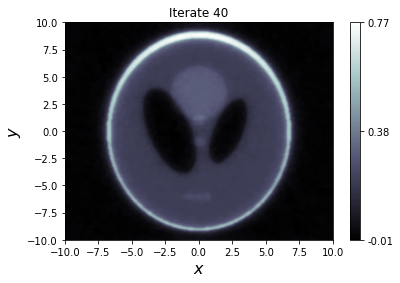

<Figure size 432x288 with 0 Axes>

iter = 50


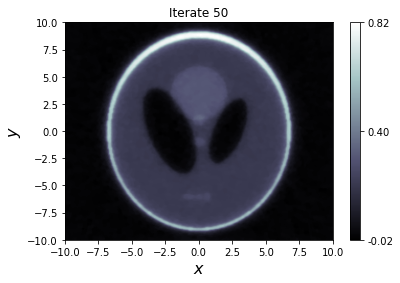

<Figure size 432x288 with 0 Axes>

iter = 60


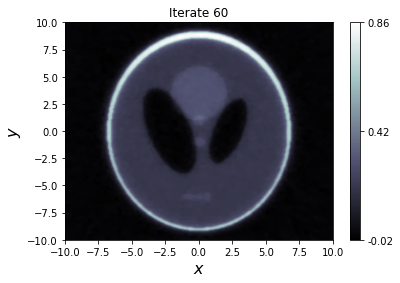

<Figure size 432x288 with 0 Axes>

iter = 70


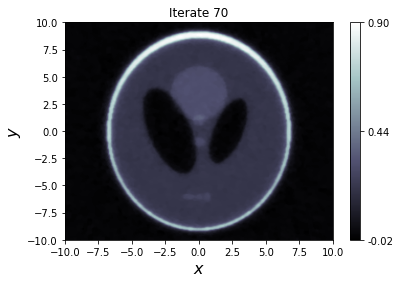

<Figure size 432x288 with 0 Axes>

iter = 80


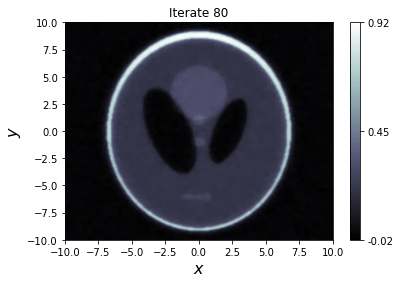

<Figure size 432x288 with 0 Axes>

iter = 90


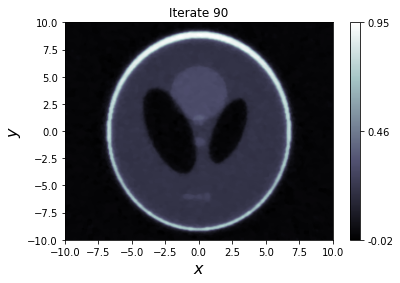

<Figure size 432x288 with 0 Axes>

iter = 100


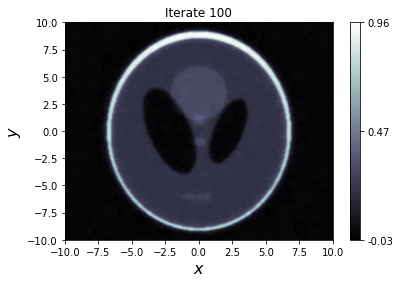

<Figure size 432x288 with 0 Axes>

iter = 110


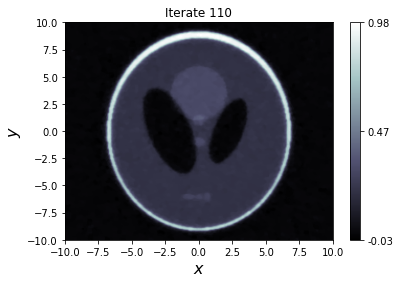

<Figure size 432x288 with 0 Axes>

iter = 120


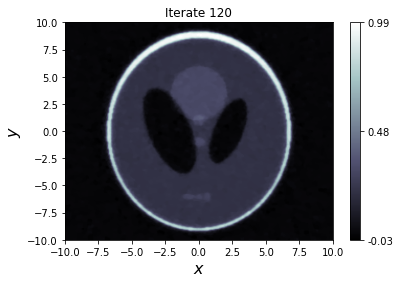

<Figure size 432x288 with 0 Axes>

iter = 130


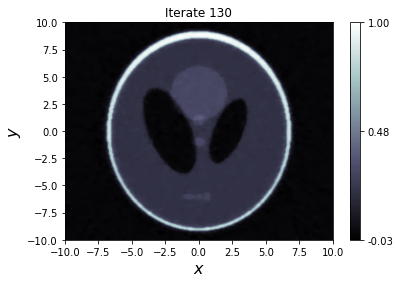

<Figure size 432x288 with 0 Axes>

iter = 140


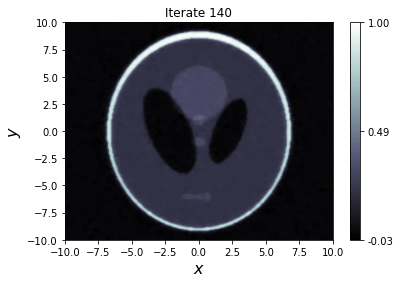

<Figure size 432x288 with 0 Axes>

iter = 150


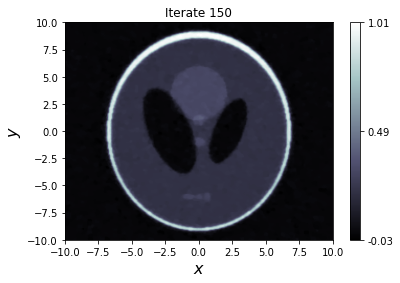

<Figure size 432x288 with 0 Axes>

iter = 160


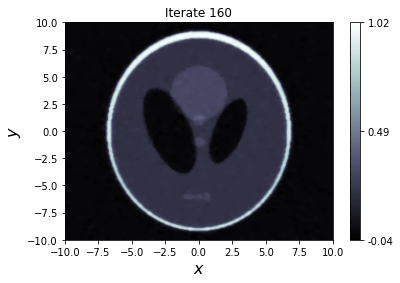

<Figure size 432x288 with 0 Axes>

iter = 170


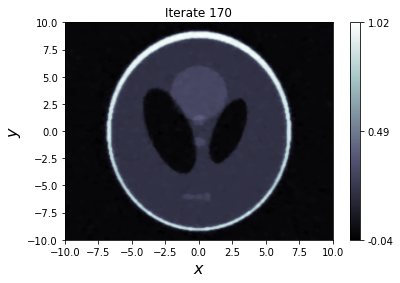

<Figure size 432x288 with 0 Axes>

iter = 180


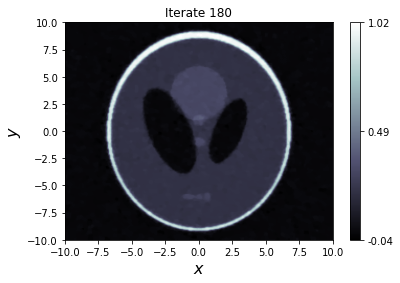

<Figure size 432x288 with 0 Axes>

iter = 190


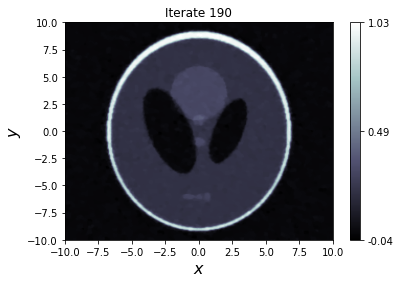

<Figure size 432x288 with 0 Axes>

iter = 200


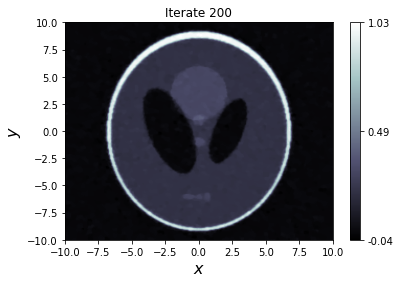

<Figure size 432x288 with 0 Axes>

iter = 210


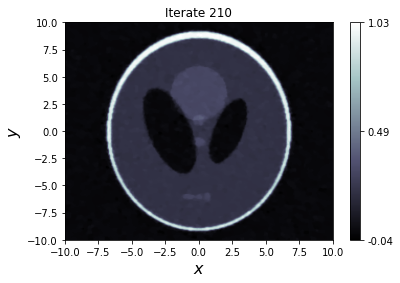

<Figure size 432x288 with 0 Axes>

iter = 220


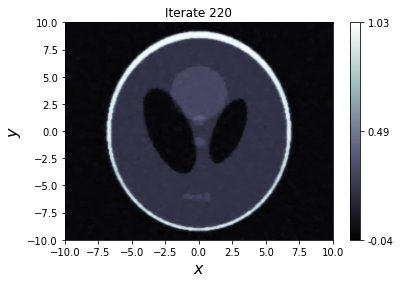

<Figure size 432x288 with 0 Axes>

iter = 230


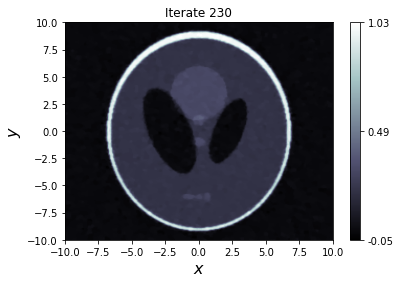

<Figure size 432x288 with 0 Axes>

iter = 240


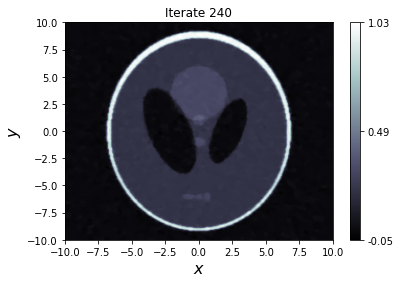

<Figure size 432x288 with 0 Axes>

iter = 250


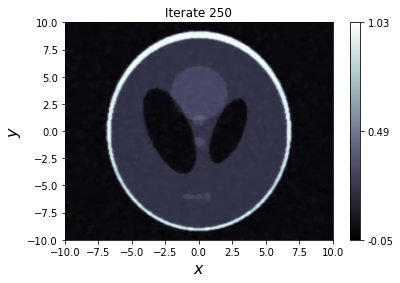

<Figure size 432x288 with 0 Axes>

iter = 260


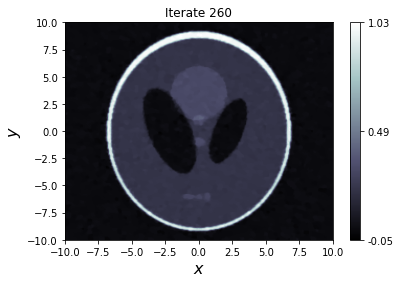

<Figure size 432x288 with 0 Axes>

iter = 270


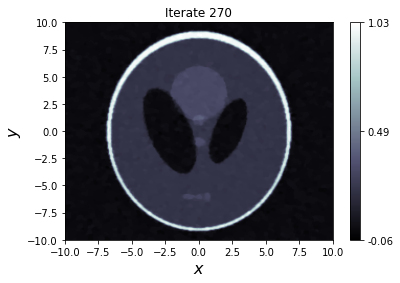

<Figure size 432x288 with 0 Axes>

iter = 280


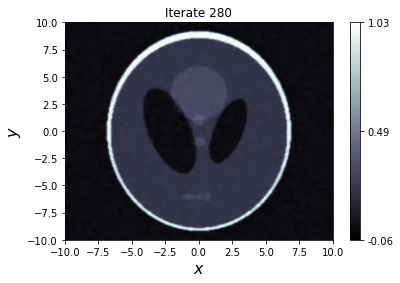

<Figure size 432x288 with 0 Axes>

iter = 290


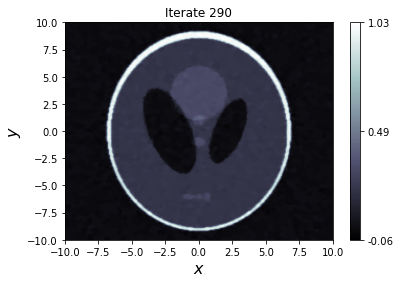

<Figure size 432x288 with 0 Axes>

In [17]:
importlib.reload(sol)
sol_phantom = sol.CtSolver(n=256, type=sol.DataType.PHANTOM)
sol_phantom.add_noise(noise=0.1)
recon_st, error_st = sol_phantom.solve_stepest_decent()

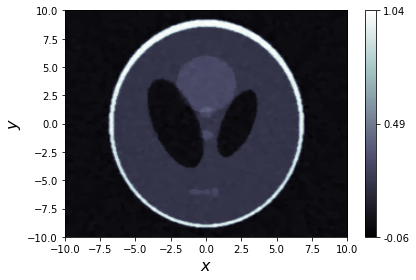

<Figure size 432x288 with 0 Axes>

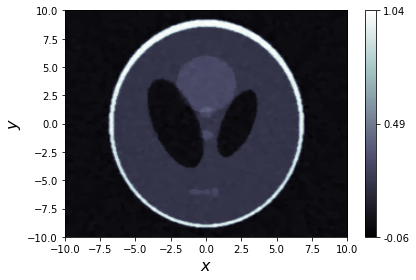

In [18]:
recon_st.show()

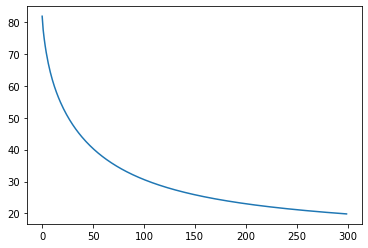

In [19]:
rel_error_st = np.array(error_st)/sol_phantom.f_true.norm() * 100
plt.plot(rel_error_st)

In [20]:
residual_error = (sol_phantom.f_true - recon_st).norm()
print('Residual Error', residual_error)

Residual Error 0.9762176324613904


## Choice of $\gamma$ of the Huber function

100%|██████████| 25/25 [06:37<00:00, 15.91s/it]


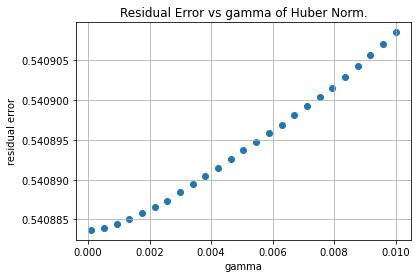

(array([ 0.0001   ,  0.0005125,  0.000925 ,  0.0013375,  0.00175  ,
         0.0021625,  0.002575 ,  0.0029875,  0.0034   ,  0.0038125,
         0.004225 ,  0.0046375,  0.00505  ,  0.0054625,  0.005875 ,
         0.0062875,  0.0067   ,  0.0071125,  0.007525 ,  0.0079375,
         0.00835  ,  0.0087625,  0.009175 ,  0.0095875,  0.01     ]),
 [0.5408836853149489,
  0.540883952222768,
  0.5408844297175642,
  0.5408850609877347,
  0.5408857871943641,
  0.540886506976649,
  0.5408873800856058,
  0.5408884295906554,
  0.5408894490279401,
  0.5408905193658315,
  0.540891528246207,
  0.5408925857434638,
  0.5408937099194868,
  0.5408947941134302,
  0.5408958631195238,
  0.5408969326314683,
  0.5408981241146567,
  0.5408992175841477,
  0.5409003635489423,
  0.5409015742881429,
  0.5409028579280163,
  0.5409042415162887,
  0.5409056271611664,
  0.5409070730652716,
  0.5409085310621322])

In [12]:
sol_phantom.set_gamma(solver=sol.SolverType.DOUGLAS_RACHFORD_PD)

100%|██████████| 20/20 [01:36<00:00,  4.85s/it]


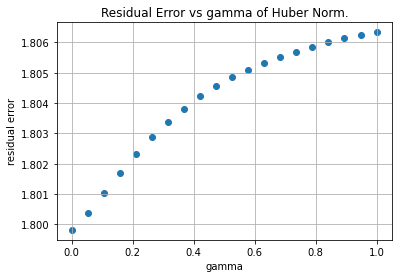

(array([ 0.001     ,  0.05357895,  0.10615789,  0.15873684,  0.21131579,
         0.26389474,  0.31647368,  0.36905263,  0.42163158,  0.47421053,
         0.52678947,  0.57936842,  0.63194737,  0.68452632,  0.73710526,
         0.78968421,  0.84226316,  0.89484211,  0.94742105,  1.        ]),
 [1.7998213190215533,
  1.8003789641727452,
  1.8010446238548354,
  1.8017037050731186,
  1.802314967989701,
  1.8028678631534598,
  1.803367577019658,
  1.8038186280340665,
  1.8042208478006643,
  1.8045674500836624,
  1.8048576200238027,
  1.8051022224140003,
  1.805319668707854,
  1.8055180709707408,
  1.8056981404346786,
  1.8058601128172165,
  1.8060049338186537,
  1.8061329463736777,
  1.8062437936948317,
  1.8063372974565974])

In [17]:
sol_phantom.set_gamma(solver=sol.SolverType.STEEPEST_DECENT)

## L-curve criterion

In [11]:
importlib.reload(sol)
noise = np.linspace(0, 1, 20)
lams = np.linspace(1e-6, 0.1, 20)
l_curves = {}
sol_phantom = sol.CtSolver(n=256, type=sol.DataType.PHANTOM)
for n in tqdm(noise): 
    sol_phantom.add_noise(noise=n)
    l_curves[n] = {'lam': [],'res_norm': [], 'sol_norm':[]}
    for lam in tqdm(lams):  
        x_lam, _ = sol_phantom.solve_douglas_rachford_pd(lam=lam, gamma=0.001, tau=1.0, niter=100 , verbose=False)
        l_curves[n]['lam'].append(lam)
        l_curves[n]['res_norm'].append(np.log((sol_phantom.ray_trafo(x_lam) - sol_phantom.g_noisy).norm()))     
        l_curves[n]['sol_norm'].append(np.log(x_lam.norm()))

 80%|████████  | 16/20 [03:35<00:52, 13.21s/it]


100%|██████████| 20/20 [1:35:31<00:00, 286.60s/it]


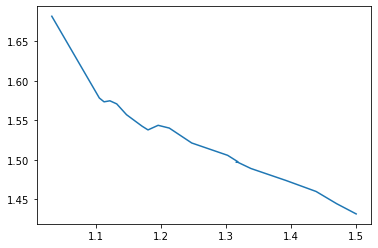

In [29]:
plt.plot(l_curves[0.15789473684210525]['res_norm'], l_curves[0.15789473684210525]['sol_norm'])

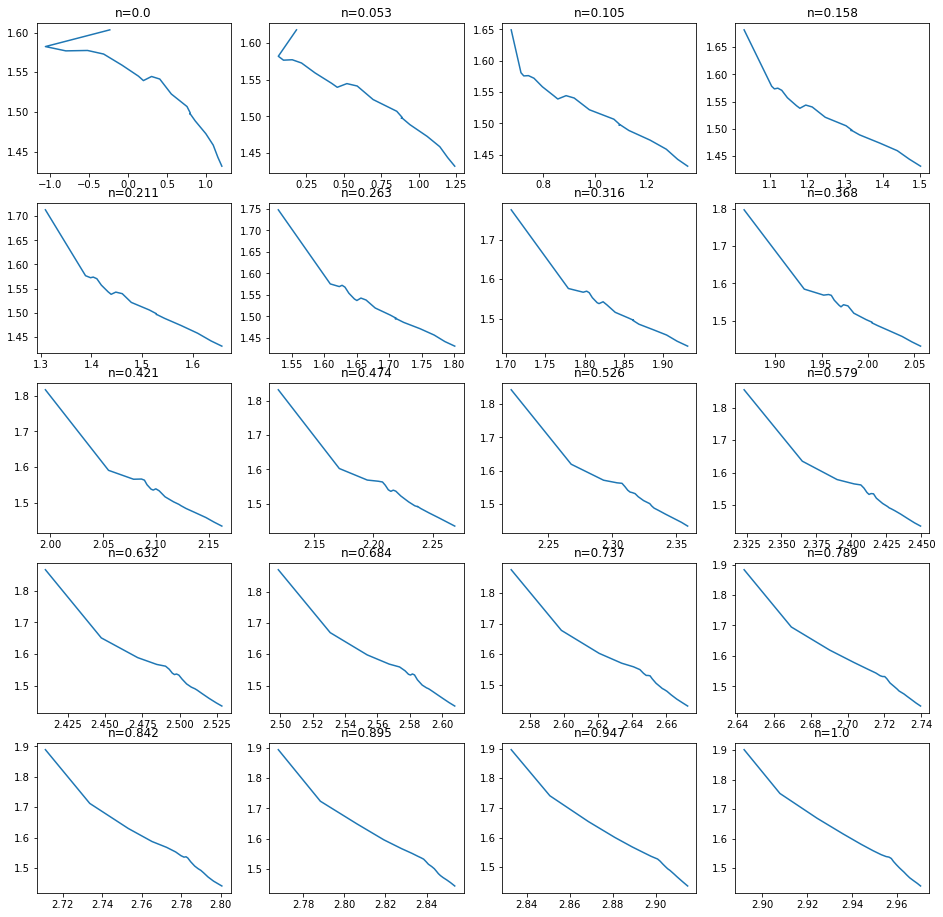

In [42]:
fig, axs = plt.subplots(5, 4, figsize=(16,16))
for i, n in enumerate(noise): 
    axs[i//4%5, i%4].plot(l_curves[n]['res_norm'], l_curves[n]['sol_norm'])
    axs[i//4%5, i%4].set_title(f"n={round(n,3)}")

### l_curve criterion with huber norm

In [51]:
importlib.reload(sol)
noise_huber = [0.1, 0.2, 0.5]
lams_huber = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
l_curves_huber = {}

sol_phantom = sol.CtSolver(n=256, type=sol.DataType.PHANTOM)
grad = odl.Gradient(sol_phantom.input_space)
huber_norm = odl.solvers.Huber(grad.range, gamma=0.001)

for n in tqdm(noise_huber): 
    sol_phantom.add_noise(noise=n)
    l_curves_huber[n] = {'res_norm': [], 'sol_huber_norm':[]}
    for lam in tqdm(lams_huber):  
        x_lam, _ = sol_phantom.solve_douglas_rachford_pd(lam=lam, gamma=0.001, tau=1.0, niter=100, verbose=False)
        l_curves_huber[n]['res_norm'].append(np.log((sol_phantom.ray_trafo(x_lam) - sol_phantom.g_noisy).norm()))     
        l_curves_huber[n]['sol_huber_norm'].append(np.log(huber_norm(grad(x_lam))))
        
np.save('l_curves_huber.npy', l_curves_huber)

100%|██████████| 3/3 [06:47<00:00, 135.86s/it]


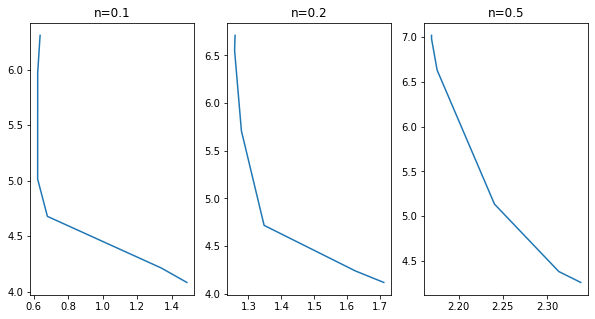

In [64]:
fig, axs = plt.subplots(1, 3,figsize=(10,5))
for i, n in enumerate(noise_huber): 
    axs[i].plot(l_curves_huber[n]['res_norm'], l_curves_huber[n]['sol_huber_norm'])
    axs[i].set_title(f"n={round(n,3)}")

### Test CT data loading

learning_rate:0.00010944472562302525
iter = 0


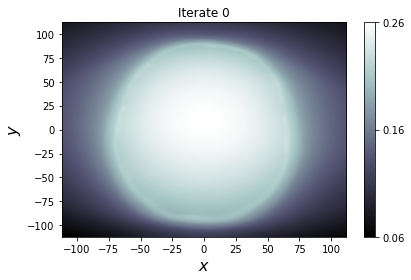

<Figure size 432x288 with 0 Axes>

iter = 10


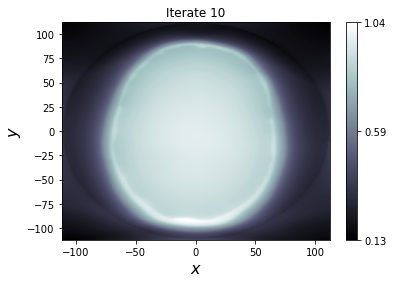

<Figure size 432x288 with 0 Axes>

In [ ]:
importlib.reload(sol)
sol_phantom = sol.CtSolver(n=256, type=sol.DataType.CT)
# recon_drpd_ct, error_drpd_ct = sol_phantom.solve_douglas_rachford_pd(lam=0.01, gamma=0.001, tau=1.0, niter=50, verbose=True)
recon_drpd_ct, error_drpd_ct = sol_phantom.solve_stepest_decent(lam=0.001, gamma=0.0001, maxiter=500, verbose=True)

iter = 0


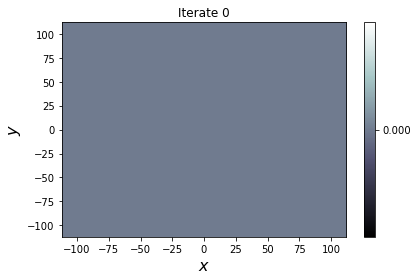

<Figure size 432x288 with 0 Axes>

In [ ]:
importlib.reload(sol)
sol_phantom = sol.CtSolver(n=256, type=sol.DataType.CT)
# print(sol_phantom.ray_trafo.range)
# print(sol_phantom.g_noisy)
recon_drpd_ct, error_drpd_ct = sol_phantom.solve_douglas_rachford_pd(lam=0.001, gamma=0.001, tau=1.0, niter=100, verbose=True)
# recon_drpd_ct, error_drpd_ct = sol_phantom.solve_stepest_decent(lam=0.001, gamma=0.001,line_search = 0.00001, maxiter=100, verbose=True)